In [ ]:
#World Happiness Report Project

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/happiness_score_dataset.csv')

In [81]:
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  DystopiaResidual               158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [83]:
df.describe(include='all')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,DystopiaResidual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


In [84]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
DystopiaResidual                 0
dtype: int64

In [85]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

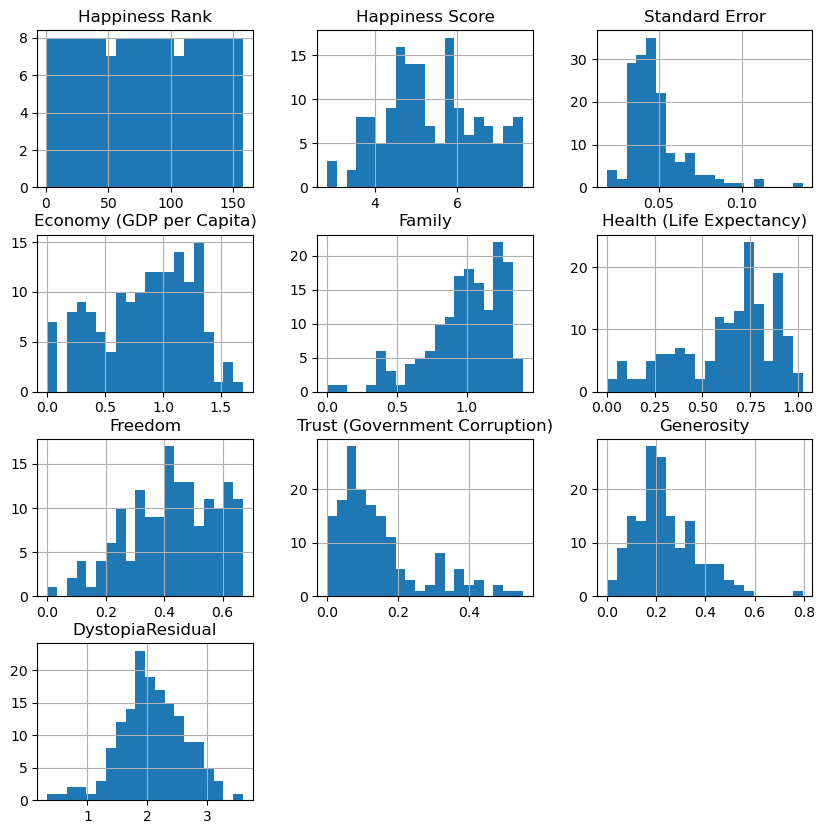

In [57]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [86]:
list_Ten_Happiest = df.sort_values(by = 'Happiness Rank')

list_Ten_Happiest.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,DystopiaResidual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [87]:
list_Ten_Least_Happiest = df.sort_values(by = 'Happiness Rank', ascending = False)

list_Ten_Least_Happiest.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,DystopiaResidual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


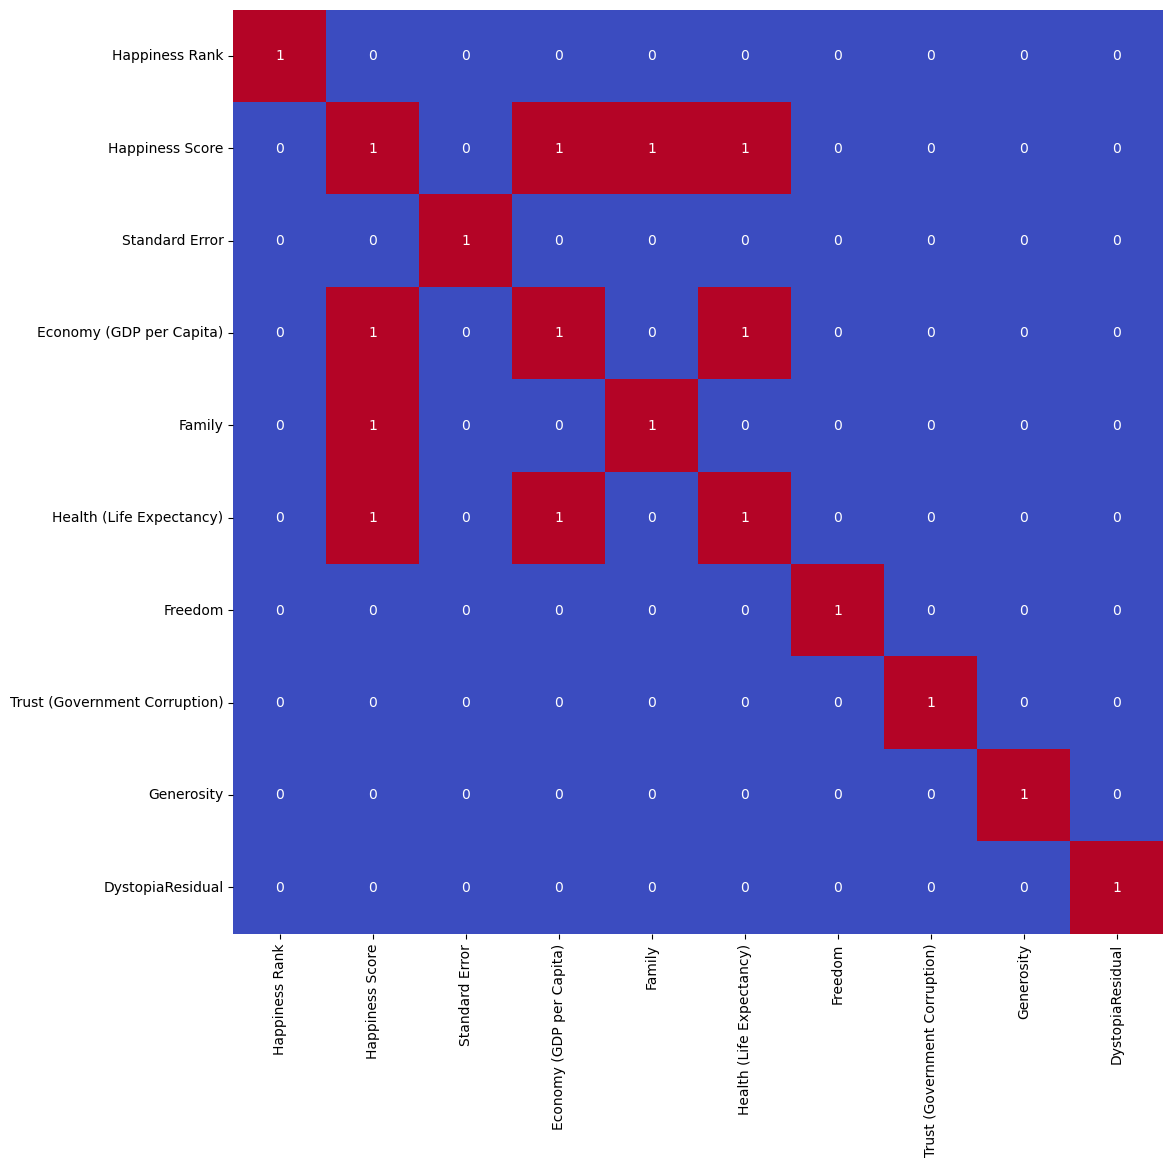

In [88]:
corr_matrix = df.corr() > 0.7
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [89]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

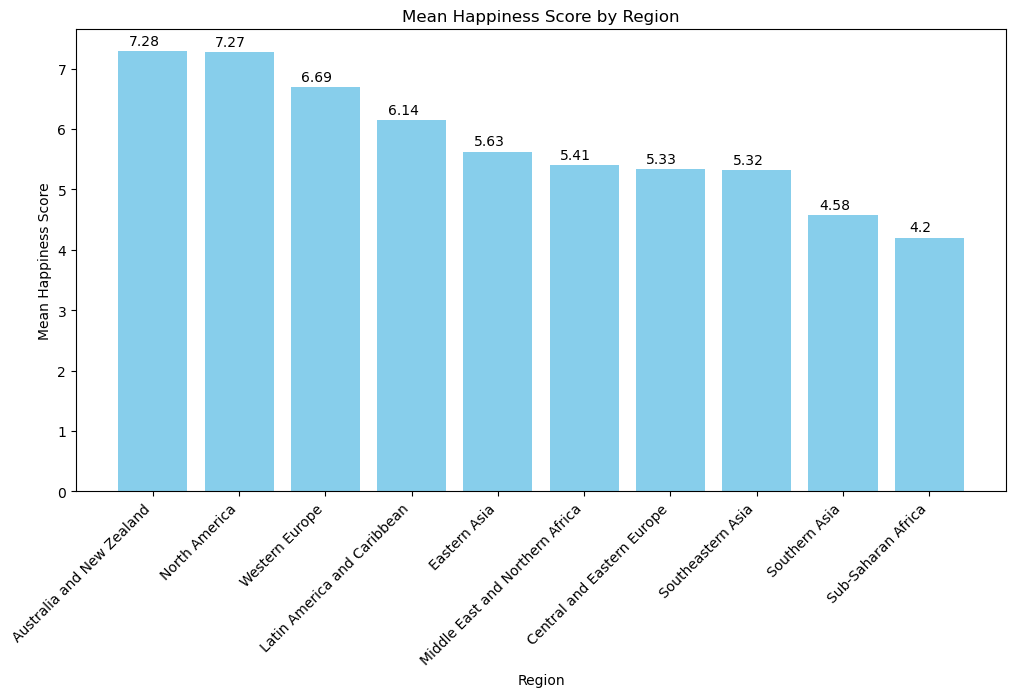

In [90]:
data_mean = df.groupby(['Region'])[['Happiness Score']].mean()

data_mean.sort_values(by = 'Happiness Score', ascending = False)
import matplotlib.pyplot as plt

# Sort the DataFrame by Happiness Score in descending order
data_mean_sorted = data_mean.sort_values(by='Happiness Score', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(data_mean_sorted.index, data_mean_sorted['Happiness Score'], color='skyblue')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Region')

# Adding data values on top of the bars
for bar in bar_plot:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, round(bar.get_height(), 2), ha='center', color='black')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


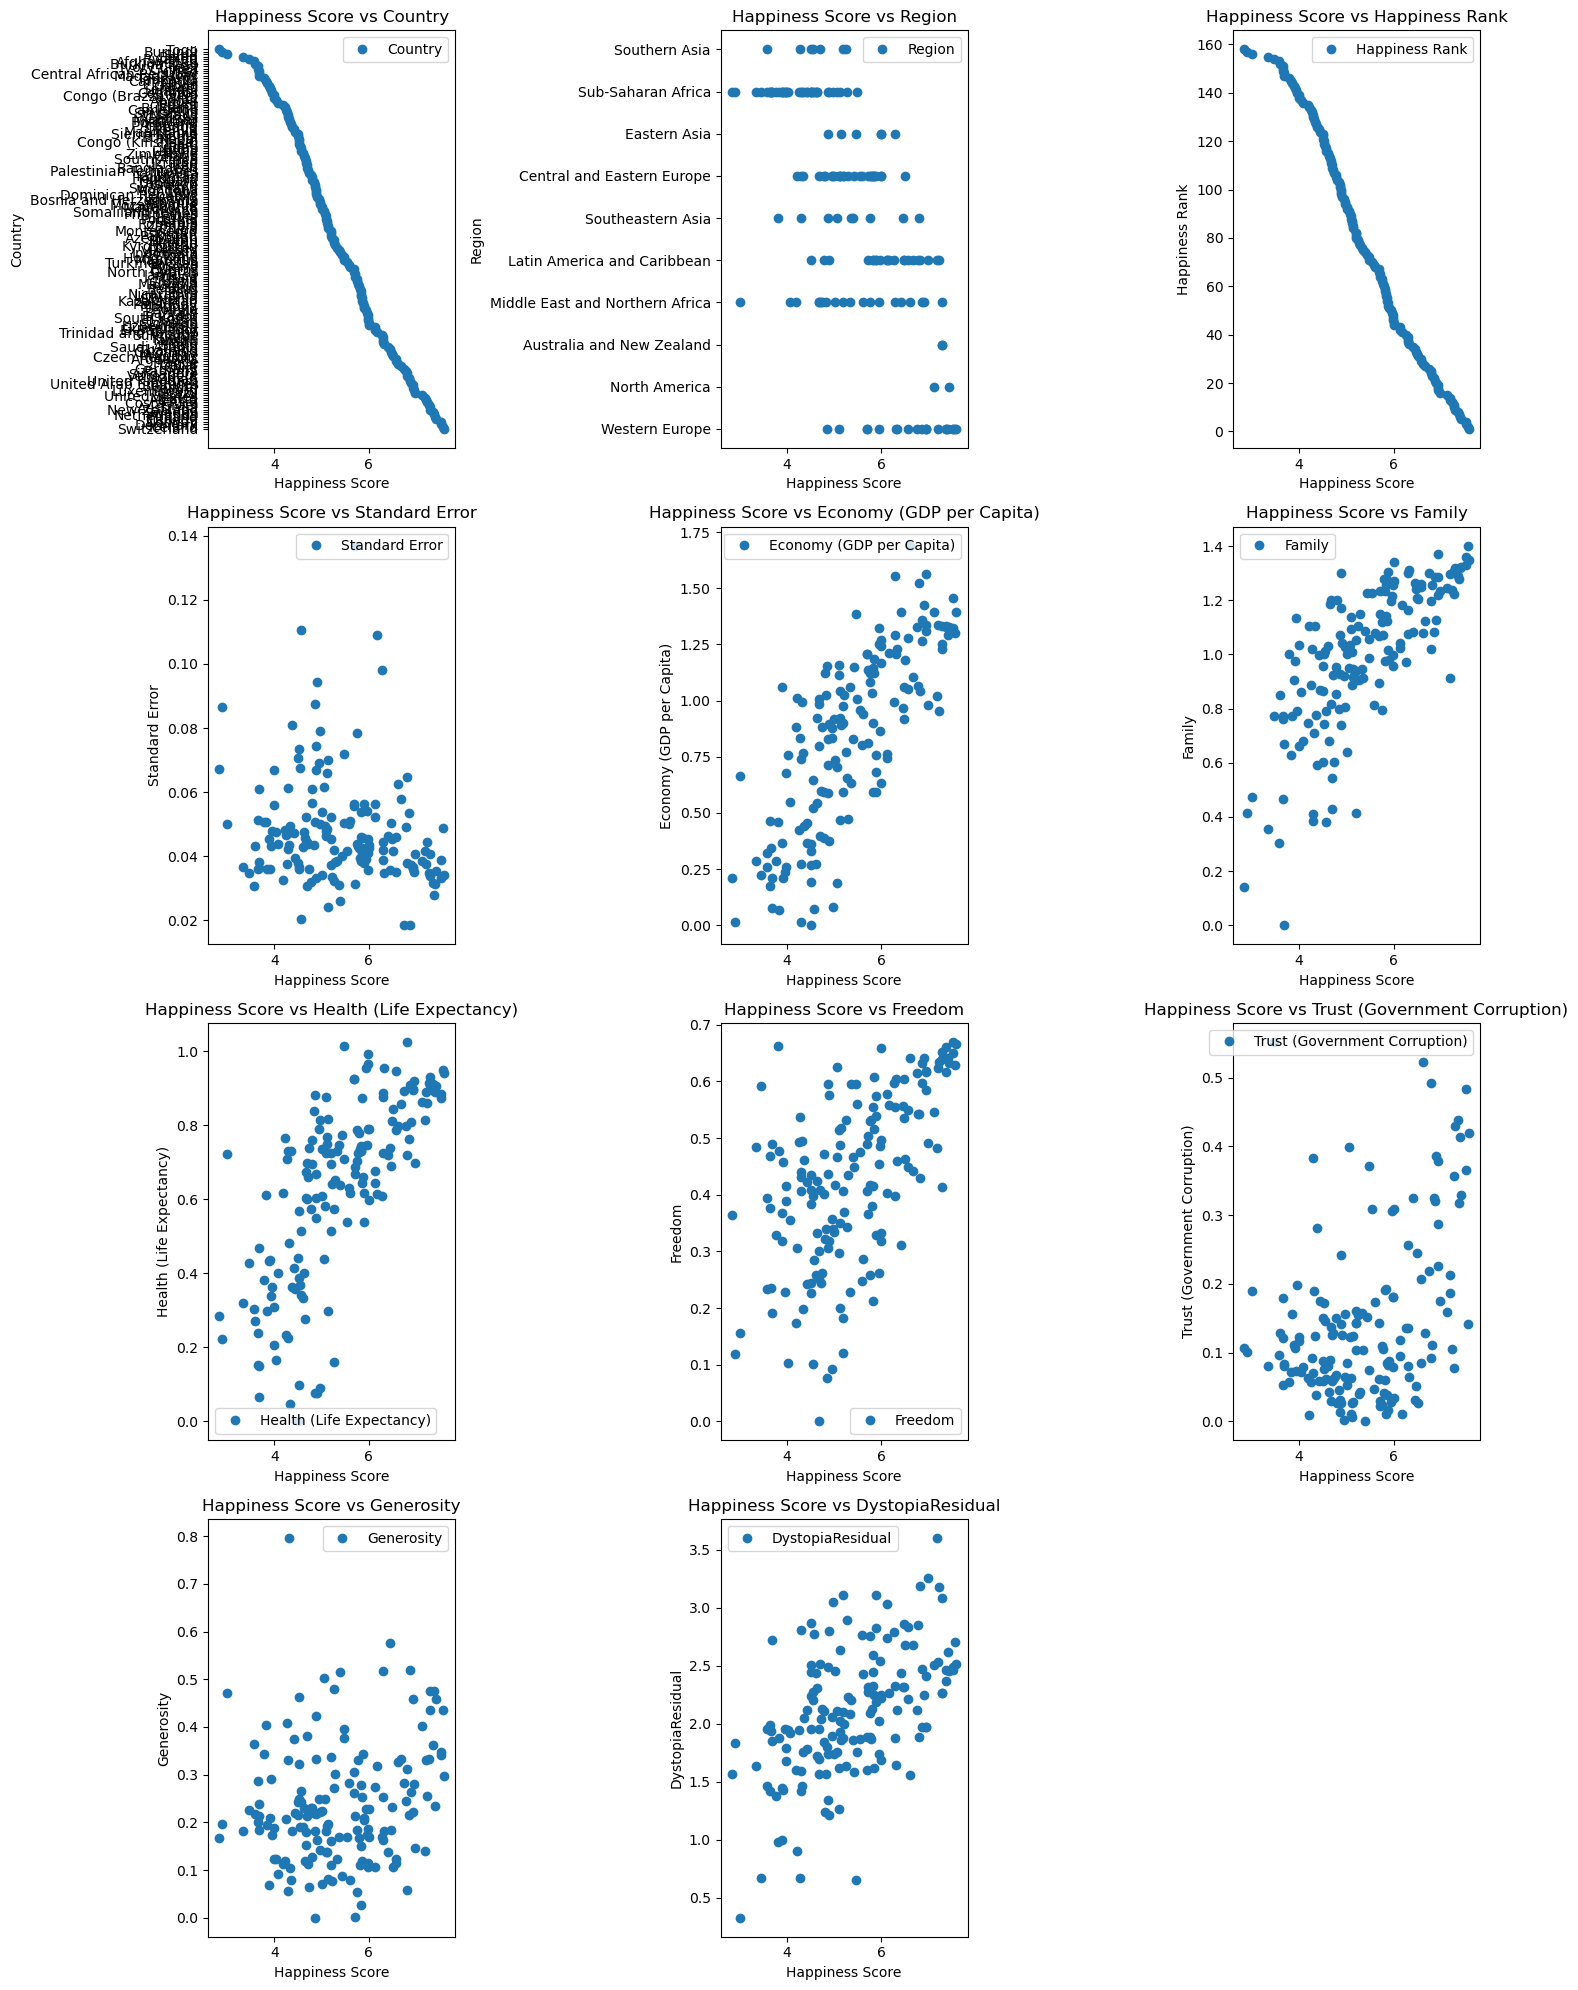

In [91]:
columns_to_plot = df.columns[df.columns != 'Happiness Score']

# Determine the number of rows and columns for subplots
num_rows = (len(columns_to_plot) - 1) // 3 + 1
num_cols = min(len(columns_to_plot), 3)

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.plot(df['Happiness Score'], df[column], marker='o', linestyle='', label=f'{column}')
    plt.title(f'Happiness Score vs {column}')
    plt.xlabel('Happiness Score')
    plt.ylabel(column)
    plt.legend()

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Family')

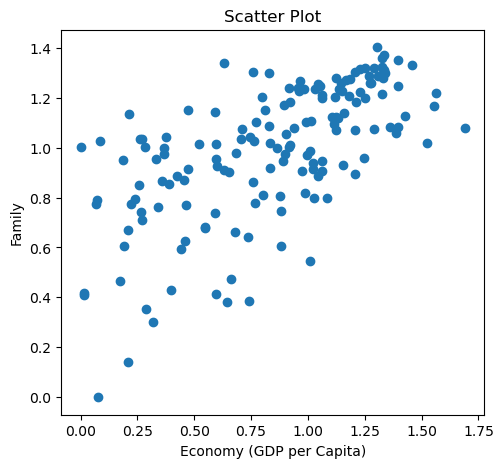

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Economy (GDP per Capita)'], df['Family'], label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Family')

Text(0.5, 0, 'Freedom')

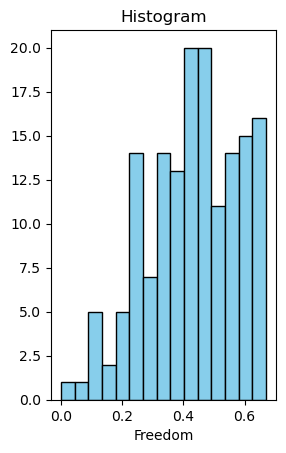

In [92]:
plt.subplot(1, 2, 2)
plt.hist(df['Freedom'], bins=15, color='skyblue', edgecolor='black', label='Histogram')
plt.title('Histogram')
plt.xlabel('Freedom')

Text(0, 0.5, 'Happiness Score')

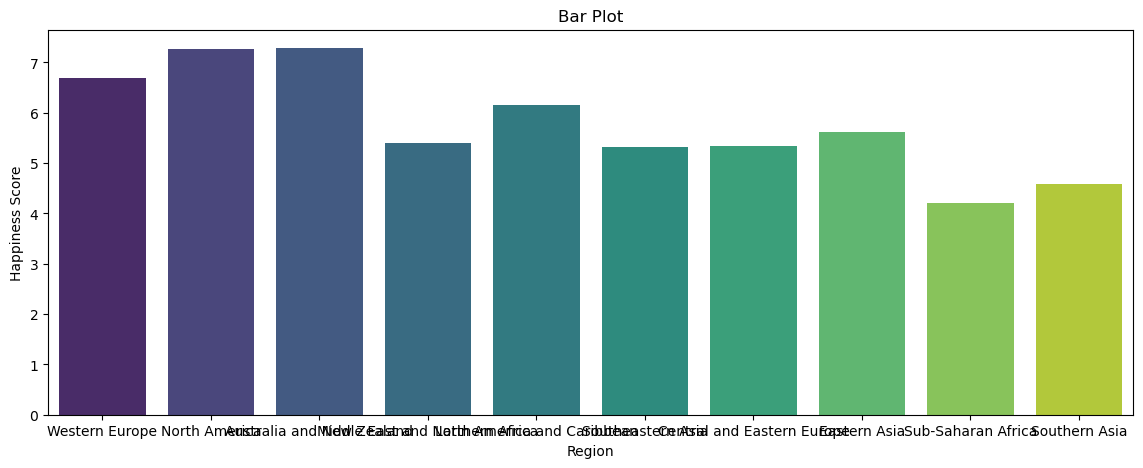

In [93]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Region', y='Happiness Score', data=df, palette='viridis', ci=None)
plt.title('Bar Plot')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Trust (Government Corruption)')

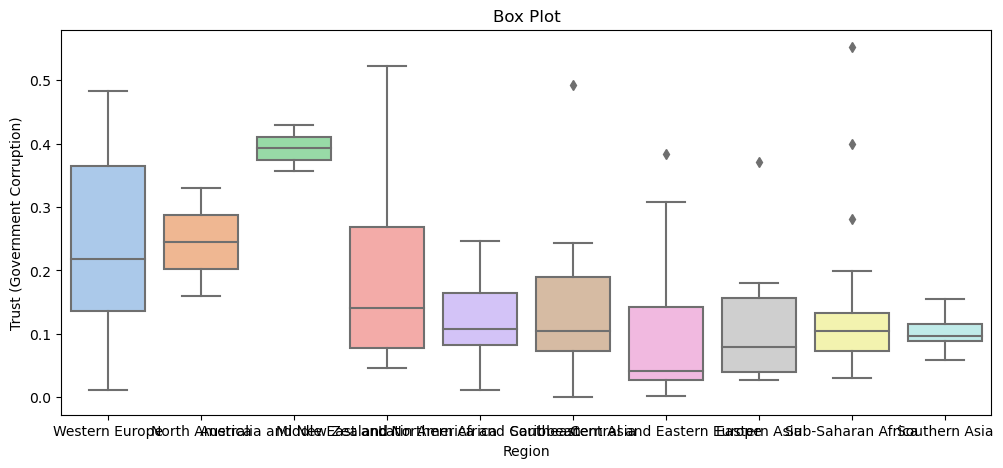

In [94]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Region', y='Trust (Government Corruption)', data=df, palette='pastel')
plt.title('Box Plot')
plt.xlabel('Region')
plt.ylabel('Trust (Government Corruption)')

Text(0.5, 1.0, 'Correlation Heatmap')

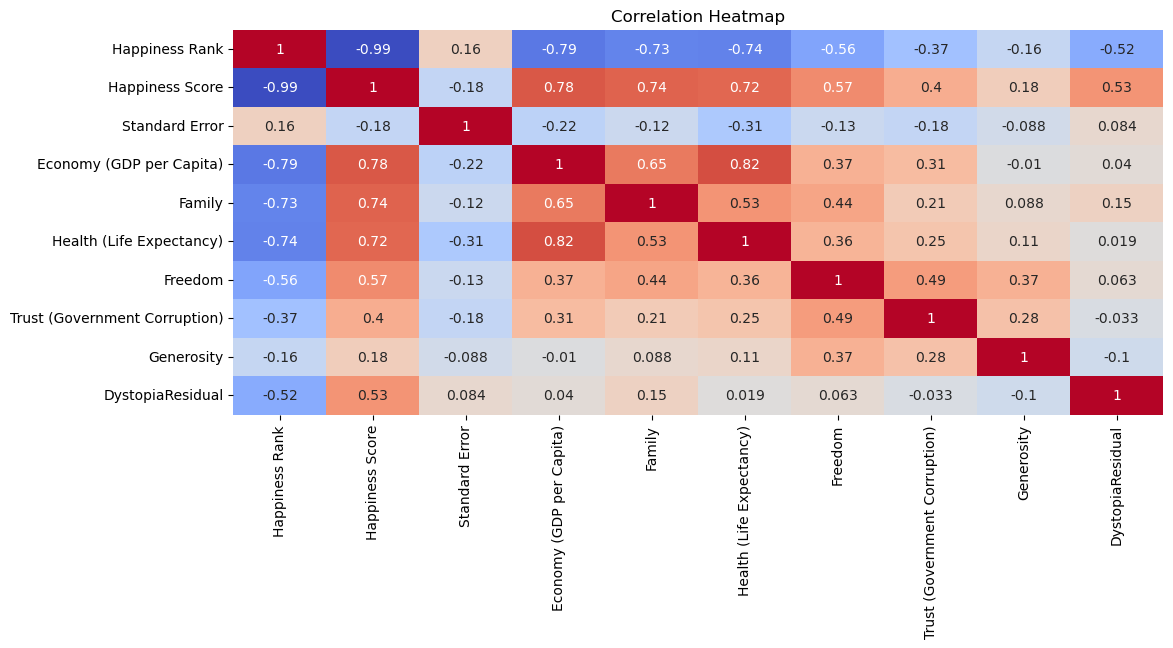

In [95]:
plt.figure(figsize=(12, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')

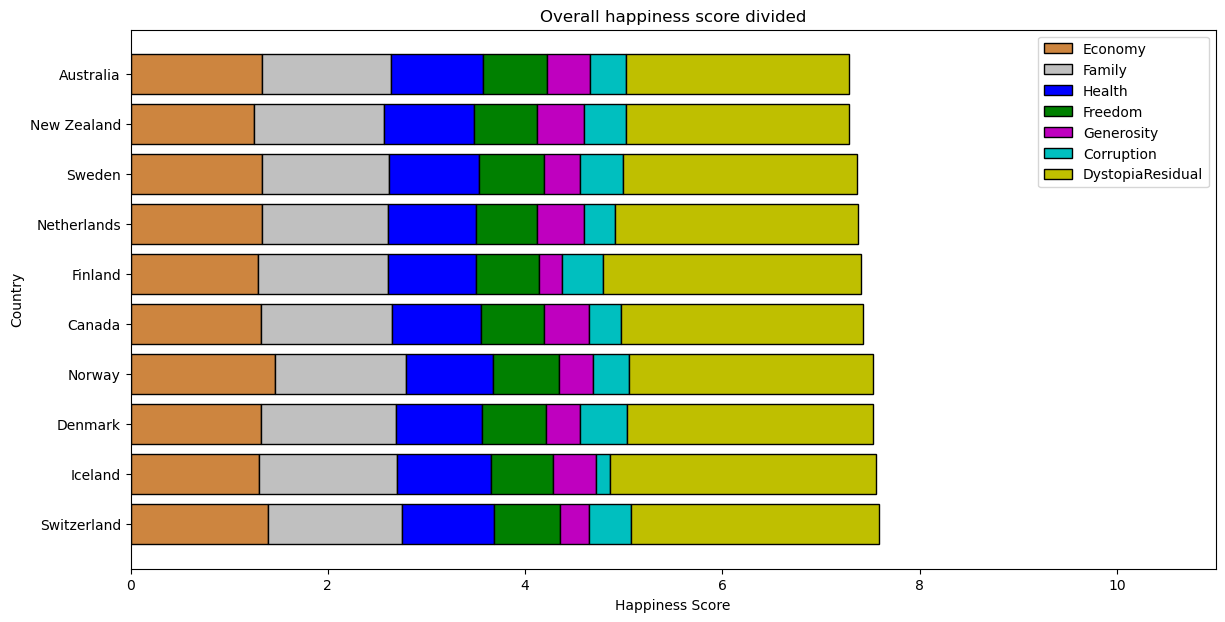

In [96]:
import numpy as np
import matplotlib.pyplot as plt

data_plot2 = df.copy()
data_plot2 = data_plot2.loc[:, 'Country':'DystopiaResidual'].head(10)

y_cor = np.arange(10)
Country = data_plot2.Country
Economy_GDP_per_Capita = data_plot2['Economy (GDP per Capita)']
Family = data_plot2.Family
Health = data_plot2['Health (Life Expectancy)']
Freedom = data_plot2.Freedom
Generosity = data_plot2.Generosity
Corruption = data_plot2['Trust (Government Corruption)']
DystopiaResidual = data_plot2.DystopiaResidual

fig, ax = plt.subplots(figsize=(14, 7))

bars = [
    plt.barh(y_cor, Economy_GDP_per_Capita, color='#CD853F', edgecolor='black', label='Economy'),
    plt.barh(y_cor, Family, color='silver', edgecolor='black', left=Economy_GDP_per_Capita, label='Family'),
    plt.barh(y_cor, Health, color='blue', edgecolor='black', left=Family + Economy_GDP_per_Capita, label='Health'),
    plt.barh(y_cor, Freedom, color='green', edgecolor='black', left=Health + Family + Economy_GDP_per_Capita, label='Freedom'),
    plt.barh(y_cor, Generosity, color='m', edgecolor='black', left=Freedom + Health + Family + Economy_GDP_per_Capita, label='Generosity'),
    plt.barh(y_cor, Corruption, color='c', edgecolor='black', left=Generosity + Freedom + Health + Family + Economy_GDP_per_Capita, label='Corruption'),
    plt.barh(y_cor, DystopiaResidual, color='y', edgecolor='black', left=Corruption + Generosity + Freedom + Health + Family + Economy_GDP_per_Capita, label='DystopiaResidual')
]

plt.yticks(y_cor, Country)
plt.title('Overall happiness score divided')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(loc='upper right')
plt.xlim(0, 11)
plt.show()


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

[4.30687656 5.98714526 4.19422953 2.90459456 5.05722436 6.57408742
 4.89752159 4.87598898 4.94866961 3.93078195 6.90138525 5.82830842
 6.98261283 5.54819956 6.78624321 6.50511943 4.50714364 4.68552873
 4.97110256 5.6952947  3.65506418 6.93738294 7.19982267 7.28399255
 6.48516263 5.1923353  5.8890335  3.9556118  4.36911658 3.68085402
 3.7807598  5.33251708]
Mean absolute error for LinearRegression= 0.0
Median absolute error for LinearRegression= 0.0
Explain variance score for LinearRegression= 1.0
R2 score for Linear Regression = 1.0


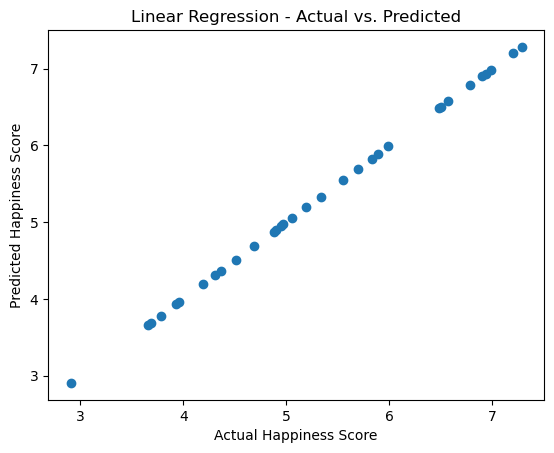

In [99]:
# Assuming df is your DataFrame
# Let's drop non-numeric columns for simplicity
df_numeric = df.select_dtypes(include=['number'])

# Separate features (X) and target variable (y)
X = df_numeric.drop('Happiness Score', axis=1)
Y = df_numeric['Happiness Score']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predicting on the test set
Y_pred1 = regressor.predict(X_test)
print(Y_pred1)
# Calculation of error for linear Regression
import sklearn.metrics as sm
print("Mean absolute error for LinearRegression=", round(sm.mean_absolute_error(Y_test, Y_pred1), 2))  
print("Median absolute error for LinearRegression=", round(sm.median_absolute_error(Y_test, Y_pred1), 2)) 
print("Explain variance score for LinearRegression=", round(sm.explained_variance_score(Y_test, Y_pred1), 2)) 
print("R2 score for Linear Regression =", round(sm.r2_score(Y_test, Y_pred1), 2))
plt.scatter(Y_test, Y_pred1)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()

Mean absolute error for DecisionTreeRegression= 0.04
Median absolute error for DecisionTreeRegression= 0.03
Explain variance score for DecisionTreeRegression= 1.0
R2 score for DecisionTreeRegression = 1.0


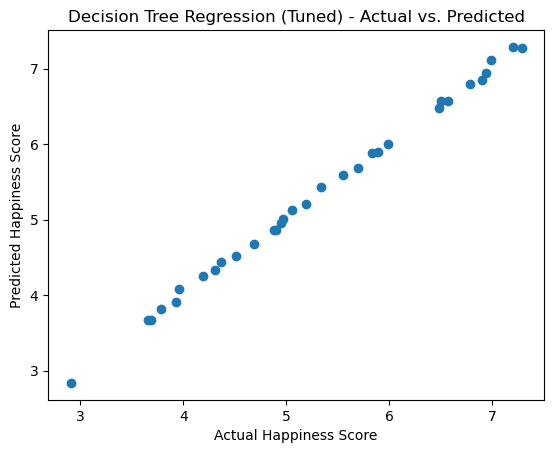

In [100]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)
Y_pred2 = tree_model.predict(X_test)
print("Mean absolute error for DecisionTreeRegression=", round(sm.mean_absolute_error(Y_test, Y_pred2), 2))  
print("Median absolute error for DecisionTreeRegression=", round(sm.median_absolute_error(Y_test, Y_pred2), 2)) 
print("Explain variance score for DecisionTreeRegression=", round(sm.explained_variance_score(Y_test, Y_pred2), 2)) 
print("R2 score for DecisionTreeRegression =", round(sm.r2_score(Y_test, Y_pred2), 2))
plt.scatter(Y_test, Y_pred2)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Decision Tree Regression (Tuned) - Actual vs. Predicted')
plt.show()

Mean absolute error for RandomForestRegression= 0.03
Median absolute error for RandomForestRegression= 0.03
Explain variance score for RandomForestRegression= 1.0
R2 score for RandomForestRegression = 1.0


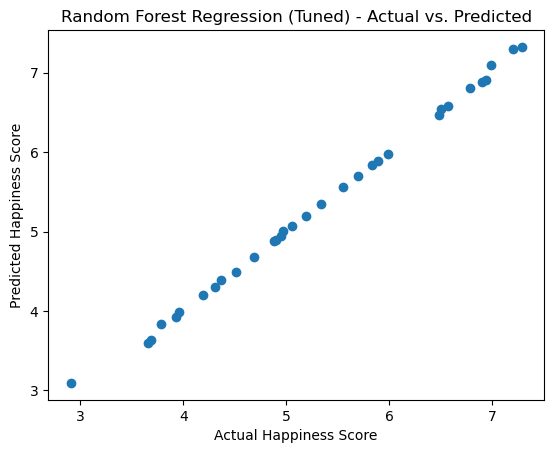

In [101]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, Y_train)
Y_pred3 = forest_model.predict(X_test)
print("Mean absolute error for RandomForestRegression=", round(sm.mean_absolute_error(Y_test, Y_pred3), 2))  
print("Median absolute error for RandomForestRegression=", round(sm.median_absolute_error(Y_test, Y_pred2), 2)) 
print("Explain variance score for RandomForestRegression=", round(sm.explained_variance_score(Y_test, Y_pred3), 2)) 
print("R2 score for RandomForestRegression =", round(sm.r2_score(Y_test, Y_pred3), 2))
plt.scatter(Y_test, Y_pred3)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Random Forest Regression (Tuned) - Actual vs. Predicted')
plt.show()